# Pratybos

<code>**1-2 : Perceptronas (numpy)**</code><br>
<code>**3-4 : Neuroninis tinklas (PyTorch)**</code><br>

### Perceptronas (numpy)

Šiame uždavinyje reikės sukurti perceptroną kuris gebėtų optimizuoti modelio parametrus taip kad išspręstu XOR problemą.
Sukurkite generinę klasę <code>**class NN**</code> kurią vėliau taip pat  panaudosite uždavinyje `#2`. Žemiau grafiko illiustracijos rasite šios klasės struktūra kurioje yra šie metodai:

- forward (skaičiavimas pirmyn)
- backward (skaičiavimas argal)
- fit (mokymasis)
- accuracy (tikslumo matavimas)
- plot (grafikus kuriantis metodas)

## #1

In [120]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
X = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
])
y = np.array([
    [0],   
    [1],   
    [1],   
    [0]
])

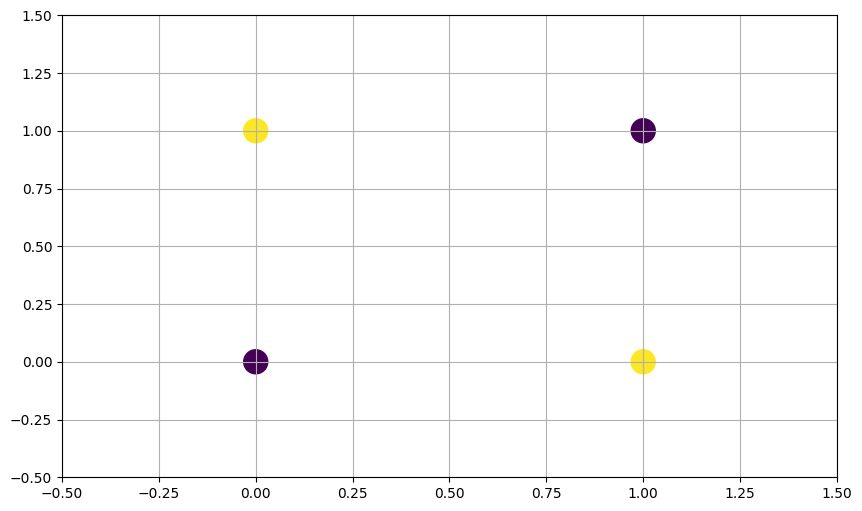

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, s=300)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)

 accuracy: 100.0 %


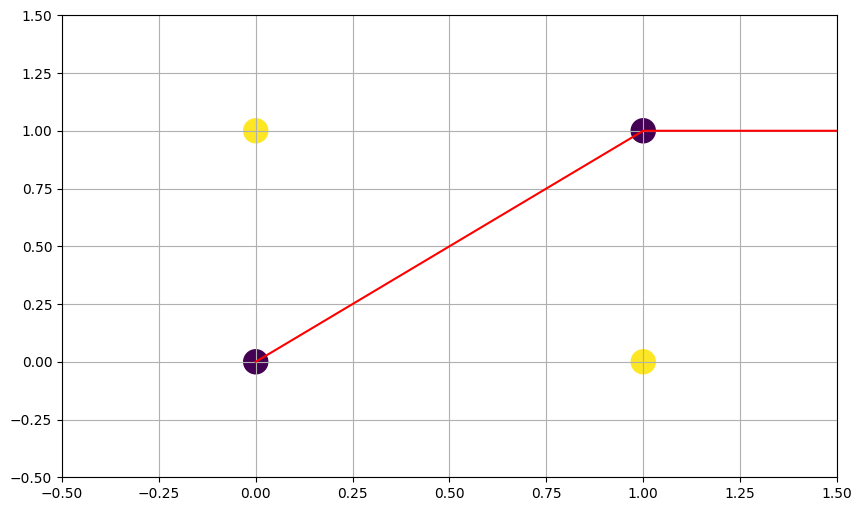

In [124]:
#TODO: Jūsų programa prasideda nuo čia

class NN():
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture    
        
        self.w1 = np.random.normal(0, 1, (_hidden, _input))  # 2x2
        self.w2 = np.random.normal(0, 1, (_output, _hidden)) # 1x2
        self.b1 = np.random.random((_hidden, 1))             # 2x1
        self.b2 = np.random.random((_output, 1))             # 1x1
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        z = X @ self.w2.T
        return self.sigmoid(z)
    
    def backward(self, X):
        act = self.sigmoid(X)
        # print (act)
        mat = np.where(act < 0.6, 0, 1)
        # for a, b in mat: 
        #     if a + b == 1:  a = 1
        #     else:           a = 0 
            # print(a)
        mat = np.where(mat[:,1:] + mat[:,:1] != 1, 0,1)
        # print(mat) 
        return mat

    def fit(self, X, y, epochs=25, lr=0.005):
        m, n = X.shape
        for i in range(epochs):
            act = self.forward(X)
            error = act - y
            derivative = X.T @ error
            # print((lr/m * derivative).T.shape, self.w2.T.shape)
            self.w2 -= (lr/m * derivative).T
            # print(f"{i}. {self.w2}")
    
    def accuracy(self, X, y):
        return np.sum(self.backward(X) == y) / y.size
    
    def plot(self, data):
        plt.figure(figsize=(10,6))
        plt.scatter(X[:,0], X[:,1], c=y, s=300)
        plt.plot(data,'r')
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.grid(True)
        return
       

nn = NN((2,2,1))
nn.fit(X,y)
data = nn.backward(X)
print(f" accuracy: {nn.accuracy(X,y) * 100} %")
plot = nn.plot(data)

## #2

Pernaudokite savo perceptrono klasę išspręsti XOR problemą su didesniu duomenų rinkinių iš `xor_data_II.csv` failo.<br>

In [129]:
data = pd.read_csv('../data_samples/xor_data_II.csv')

In [130]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [131]:
X = data[['x1', 'x2']].values
y = data['y'].values

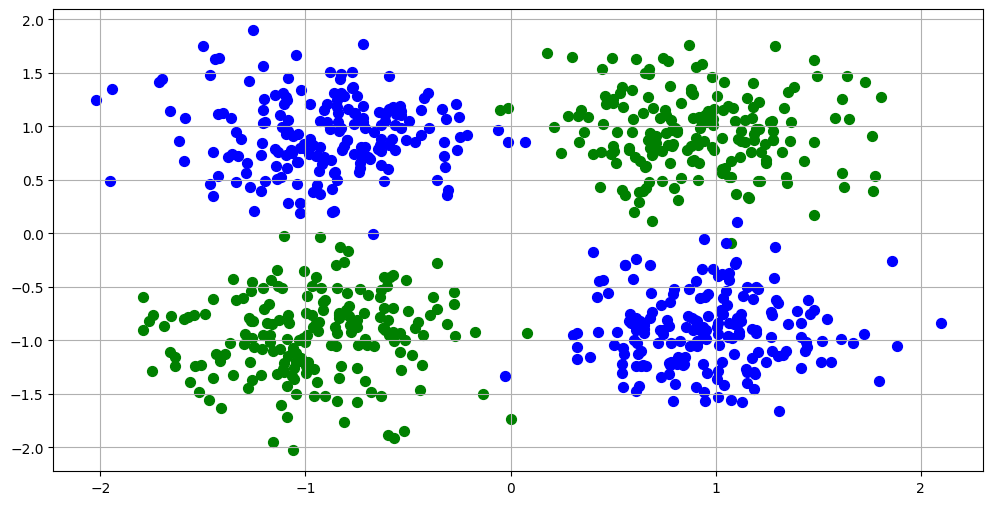

In [132]:
plt.figure(figsize=(12,6))
plt.scatter(*X[y==0].T, c='g', s=50)
plt.scatter(*X[y==1].T, c='b',s=50)
plt.grid(True)

 accuracy: 37500.0 %


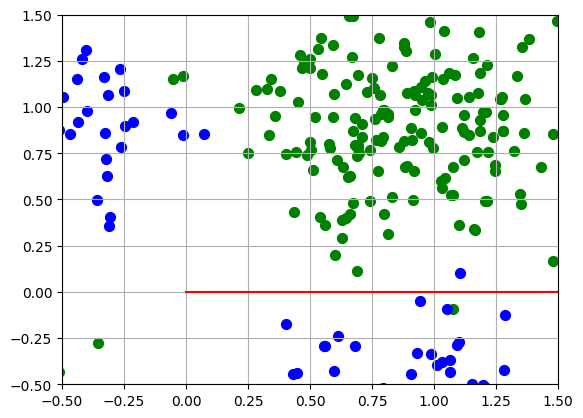

In [163]:
#TODO: Jūsų programa prasideda nuo čia
class NN():
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture    
        
        self.w1 = np.random.normal(0, 1, (_hidden, _input))  # 2x2
        self.w2 = np.random.normal(0, 1, (_output, _hidden)) # 1x2
        self.b1 = np.random.random((_hidden, 1))             # 2x1
        self.b2 = np.random.random((_output, 1))             # 1x1
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        # print(X.T.shape, self.w2.T.shape)
        z = X.T @ self.w2.T
        return self.sigmoid(z)
    
    def backward(self, X):
        act = self.sigmoid(X)
        # print (np.average(np.unique(act)))
        mat = np.where(act < np.average(np.unique(act)), 0, 1)
        # for a, b in mat: 
        #     if a + b == 1:  a = 1
        #     else:           a = 0 
            # print(a)
        mat = np.where(mat[:,1:] + mat[:,:1] != 1, 0,1)
        # print(mat) 
        return mat

    def fit(self, X, y, epochs=25, lr=0.005):
        m, n = X.shape
        for i in range(epochs):
            act = self.forward(X)
            error = act - y
            # print(X.T.shape, error.shape)
            derivative = X @ error
            # print(sum((lr/m * derivative)).shape, self.w2.shape)
            self.w2 -= sum(lr/m * derivative)
            # print(f"{i}. {self.w2}")
    
    def accuracy(self, X, y):
        return np.sum(self.backward(X) == y) / y.size
    
    def plot(self, data):
        # plt.figure(figsize=(12,6))
        plt.scatter(*X[y==0].T, c='g', s=50)
        plt.scatter(*X[y==1].T, c='b',s=50)
        plt.plot(data,'r')
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.grid(True)
        return



n,m = X.shape
nn = NN((2,n,1))
nn.fit(X,y,300)
data = nn.backward(X)
# print (data)
print(f" accuracy: {nn.accuracy(X,y) * 100} %")
plot = nn.plot(data)

### Neuroninis tinklas (PyTorch)

## #3

Atlikite tą patį uždavinį (sukurti perceptrono generinę klasę kuri gali išspręsti XOR problemą) taikydami `PyTorch` biblioteką.

cost: 0.0472


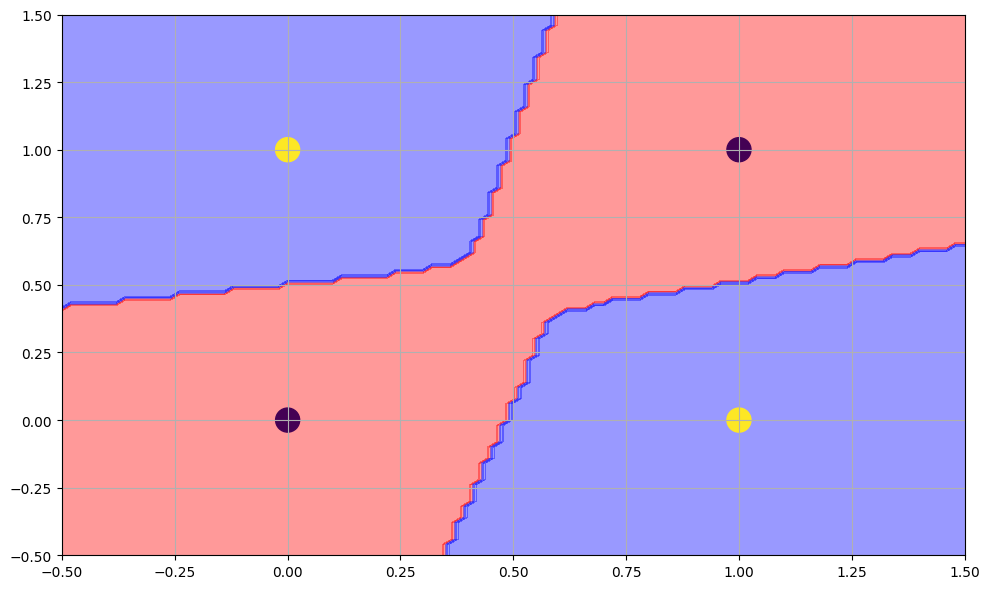

In [177]:
#TODO: Jūsų programa prasideda nuo čia
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

DEVICE     = 'cpu'
NUM_EPOCHS = 250

X = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
])
y = np.array([0, 1, 1, 0])


class MLPLinear(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_classes):
        super(MLPLinear, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1   = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)
        
    def forward(self, x):
        
        out = self.linear_1(x)
        out = F.relu(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

    
    
model     = MLPLinear(num_features=2, num_hidden_1=50, num_classes=2)
model     = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

start_time     = time.time()
minibatch_cost = []

features = torch.tensor(X, dtype=torch.float).to(DEVICE)
targets  = torch.tensor(y, dtype=torch.long).to(DEVICE)



for epoch in range(NUM_EPOCHS):
    logits, probas = model(features)
    cost           = F.cross_entropy(logits, targets)
   
    optimizer.zero_grad()
    cost.backward()
    minibatch_cost.append(cost)
    optimizer.step()
    
print(f'cost: {cost:.4f}')


def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(10,6))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    
    plt.scatter(X[:,0], X[:,1], c=y, s=300)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    
plot_decision_regions(features, targets, classifier=model)
plt.tight_layout()



## #4

Pritaikykite savo neurininio tinklo modelį spręsti `mnist` klasifiakcijos problemą. Duomenys rasite 
`data_samples/mnist` kataloge

(750, 2) (750,)
cost: 0.0506


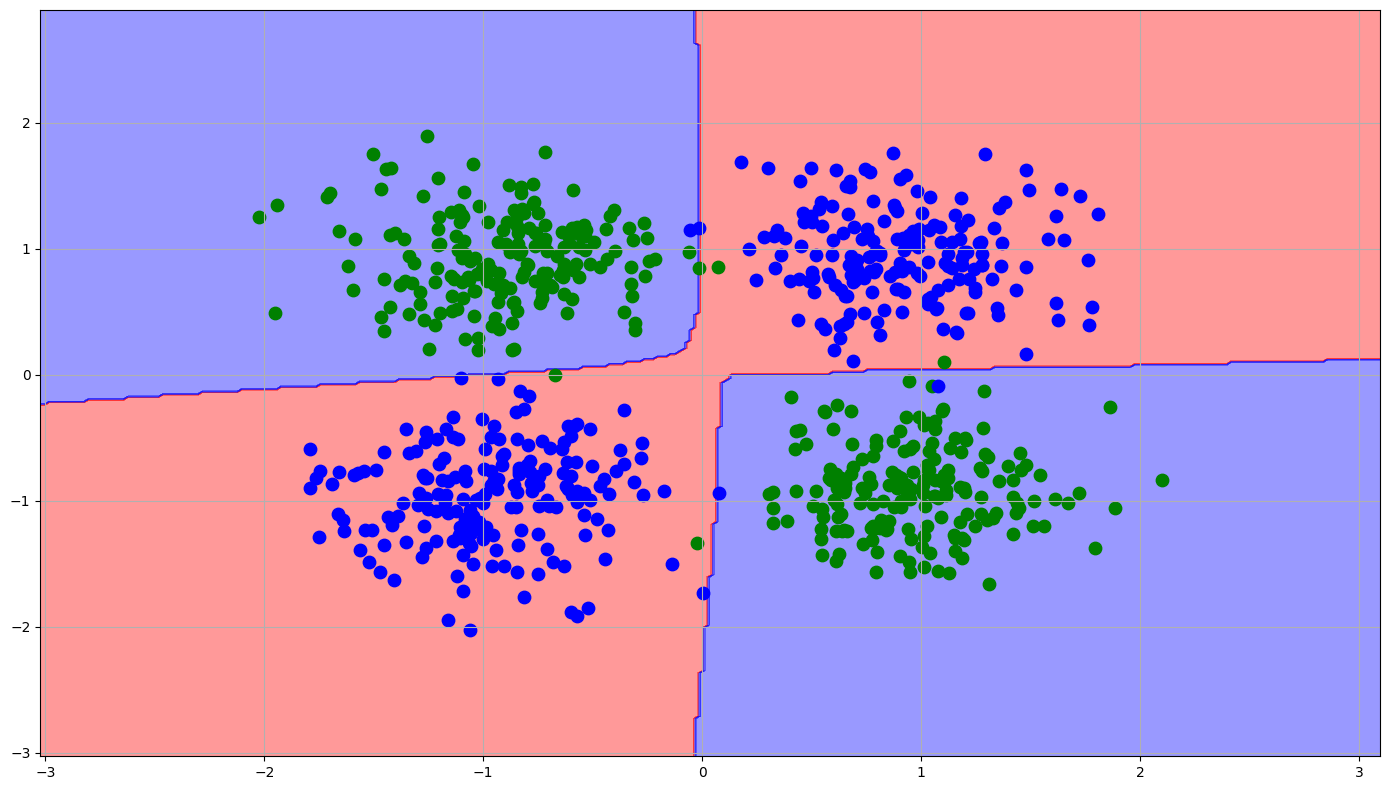

In [173]:
#TODO: Jūsų programa prasideda nuo čia

import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

DEVICE     = 'cpu'
NUM_EPOCHS = 250

data = pd.read_csv('../data_samples/xor_data_II.csv')
X    = data[['x1', 'x2']].values
y    = data['y'].values

print (X.shape, y.shape)



class MLPLinear(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_classes):
        super(MLPLinear, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1   = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)
        
    def forward(self, x):
        
        out = self.linear_1(x)
        out = F.relu(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

    
    
model     = MLPLinear(num_features=2, num_hidden_1=50, num_classes=2)
model     = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

start_time     = time.time()
minibatch_cost = []

features = torch.tensor(X, dtype=torch.float).to(DEVICE)
targets  = torch.tensor(y, dtype=torch.long).to(DEVICE)



for epoch in range(NUM_EPOCHS):
    logits, probas = model(features)
    cost           = F.cross_entropy(logits, targets)
   
    optimizer.zero_grad()
    cost.backward()
    minibatch_cost.append(cost)
    optimizer.step()
    
print(f'cost: {cost:.4f}')


def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(14,8))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(*X[y==1].T, marker='o', s=80, c='g')
    plt.scatter(*X[y==0].T, marker='o', s=80, c='b')
    
    plt.grid(True)
    
plot_decision_regions(features, targets, classifier=model)
plt.tight_layout()

<code>**Šių uždavinų užbaigimo terminas iki 12/05 (imtinai). Sekmės!**</code>